<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # difference between gpu '0' and '1'

import numpy as np
import tensorflow as tf2
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import scipy.io
from sklearn.decomposition import PCA
import pdb

import pandas as pd
import scanpy as sc


import scipy.sparse
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import datetime 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

os.getpid()


2023-09-11 11:11:04.029107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 11:11:05.026888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


893059

In [2]:

np.random.seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)


Building model

In [3]:
name = "Immune_Human"

In [4]:

"""
Specify path of the input data here...
"""

data_path = {
"Immune_Human" : "/home/ajita/Documents/data_integration/Immune/Immune_ALL_human.h5ad",
}


batch_key_dict = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch",
                 "Healthy_Heart" : "sampleID"
                 
                }
cell_type_key_dict = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',  
                 'Pancreas' : 'celltype', 
                 'Human_Mouse' : "celltype", 
                 "Human_Retina":"Subcluster",
                "Healthy_Heart" : "celltype"
                }    


learning_rate = {
                 'Immune_Human' : {"lr_ae" : 0.0002, "lr_dis": 0.0007}, # Small Datasets
                 'Human_Mouse' : {"lr_ae" : 0.0001, "lr_dis": 0.00001}} # Big Datasets >= 0.5 million cells



2023-09-11 11:11:09.792245: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5367 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5


Reading data
encoder input shape  Tensor("concat:0", shape=(?, 2010), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 20), dtype=float32)
KL gaussian z Tensor("mul_10:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_9:0", shape=(?,), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

scDREAMER on DataSet /home/ajita/Documents/data_integration/Immune/Immune_ALL_human.h5ad ... 


2023-09-11 11:11:27.394966: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Epoch : [0] ,  a_loss = 517.4740
Epoch : [10] ,  a_loss = 404.9055
Epoch : [20] ,  a_loss = 387.9700
Epoch : [30] ,  a_loss = 377.7227
Epoch : [40] ,  a_loss = 370.3291
Epoch : [50] ,  a_loss = 364.6830
Epoch : [60] ,  a_loss = 360.1932
Epoch : [70] ,  a_loss = 356.5710
Epoch : [80] ,  a_loss = 353.6123
Epoch : [90] ,  a_loss = 351.1530
Epoch : [100] ,  a_loss = 349.0877
Epoch : [110] ,  a_loss = 347.3361
Epoch : [120] ,  a_loss = 345.8348
Epoch : [130] ,  a_loss = 344.5367
Epoch : [140] ,  a_loss = 343.4210
Epoch : [150] ,  a_loss = 342.4485
Epoch : [160] ,  a_loss = 341.5910
Epoch : [170] ,  a_loss = 340.8280
Epoch : [180] ,  a_loss = 340.1471
Epoch : [190] ,  a_loss = 339.5352
Epoch : [200] ,  a_loss = 338.9785
Epoch : [210] ,  a_loss = 338.4554
Epoch : [220] ,  a_loss = 337.9802
Epoch : [230] ,  a_loss = 337.5596
Epoch : [240] ,  a_loss = 337.1724
latent_matrix shape (33506, 10)
(33506,)


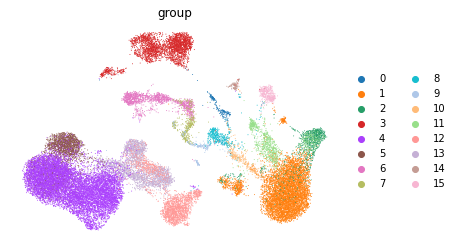

None


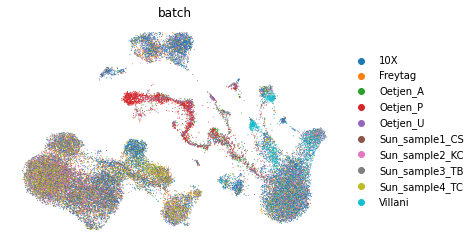

None
Computing NMI ...
Done !
NMI = 0.7147908333625209


In [5]:
    
# add avg of losses,

import model as model


run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 250,
        dataset_name = data_path[name],
        batch = batch_key_dict[name],
        cell_type = cell_type_key_dict[name],
        name = name,
        lr_ae = learning_rate[name]['lr_ae'],
        lr_dis = learning_rate[name]['lr_dis']
        )

    dreamer.train_cluster()

